# Group 5 ML project - Stroke prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from scipy.stats import chi2_contingency, ttest_ind, f_oneway

import warnings
warnings.filterwarnings('ignore')

**1. Read the dataset and view the first 10 rows of it.**

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**2. Check the shape/dimension of the dataset**


In [4]:
df.shape

(5110, 12)

**3. Check for the missing values.Display number of missing values per column.**

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**4. Investigate and predict the missing BMI Value.**

In [6]:
df.bmi.describe()
# mean and median is very close 
# it indicates the distribution is close to normal

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [7]:
bmi_mean=round(df.bmi.mean(),2)
df.bmi.fillna(bmi_mean, inplace=True)# we have replaced missing value with mean.

In [8]:
df.bmi.isnull().sum()

0

**5. Check the datatype, number of non null values and name of each variable in the dataset.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**6. Check the descriptive statistics of the dataset.**

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893110,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [12]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [14]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [15]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [16]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

**7. Visualize the proportion of Stroke samples in the dataset.**

In [17]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

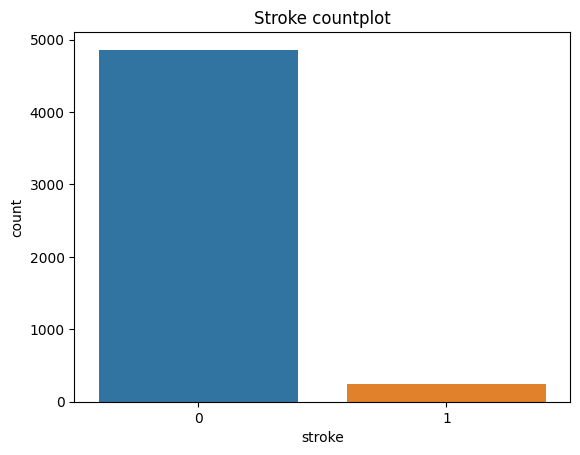

In [18]:
sns.countplot(data=df, x='stroke')
plt.title('Stroke countplot')
plt.show()

- we see stroke occurance has very low samples in our dataset
- we will need to analyse and perform sampling techniques

**8. Visualize the Distribution of Male and Female Ages. Write the Observation.**


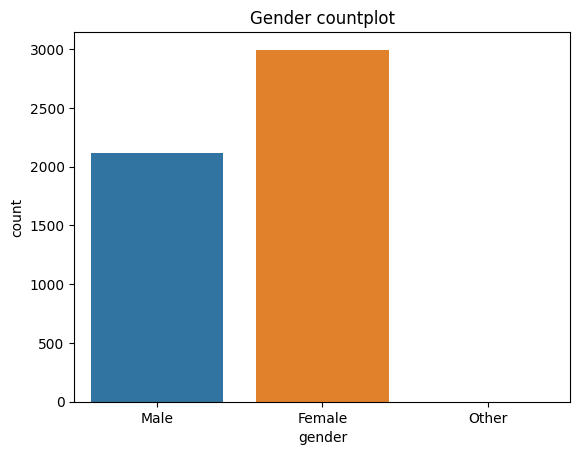

In [19]:
sns.countplot(data=df, x='gender')
plt.title('Gender countplot')
plt.show()

- we have more female data than male
- we have 1 other gender , we can drop or replace with mode->Female

**10. Visualize the stroke sample based on
        a) BMI and Glucose Level
        b) BMI and Age**

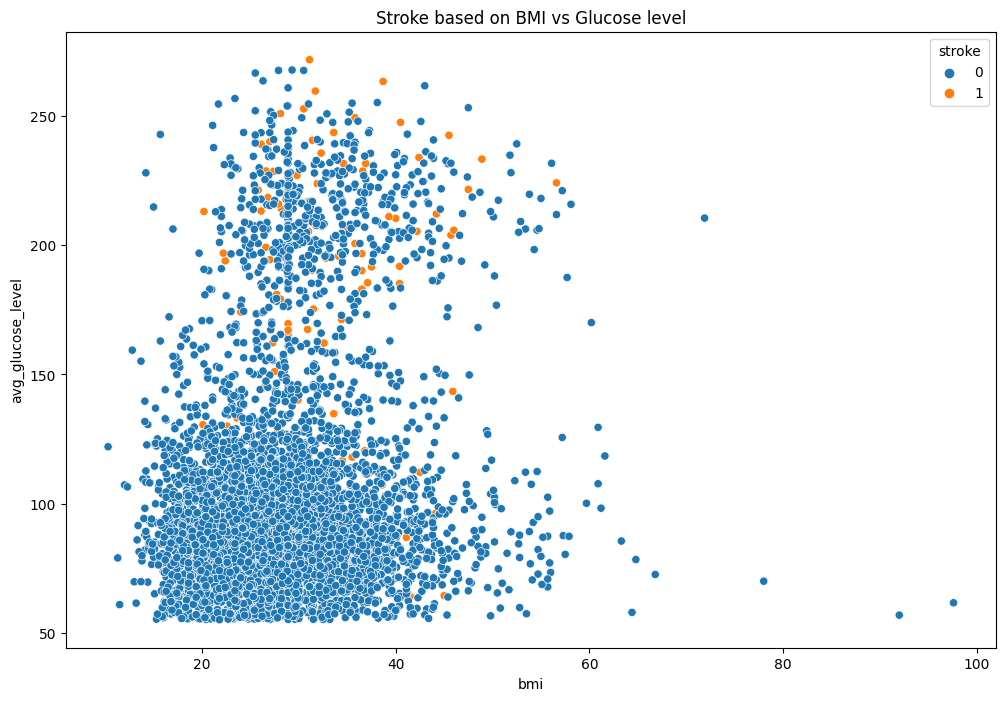

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='bmi',y='avg_glucose_level' , hue='stroke')
plt.title('Stroke based on BMI vs Glucose level')
plt.show()

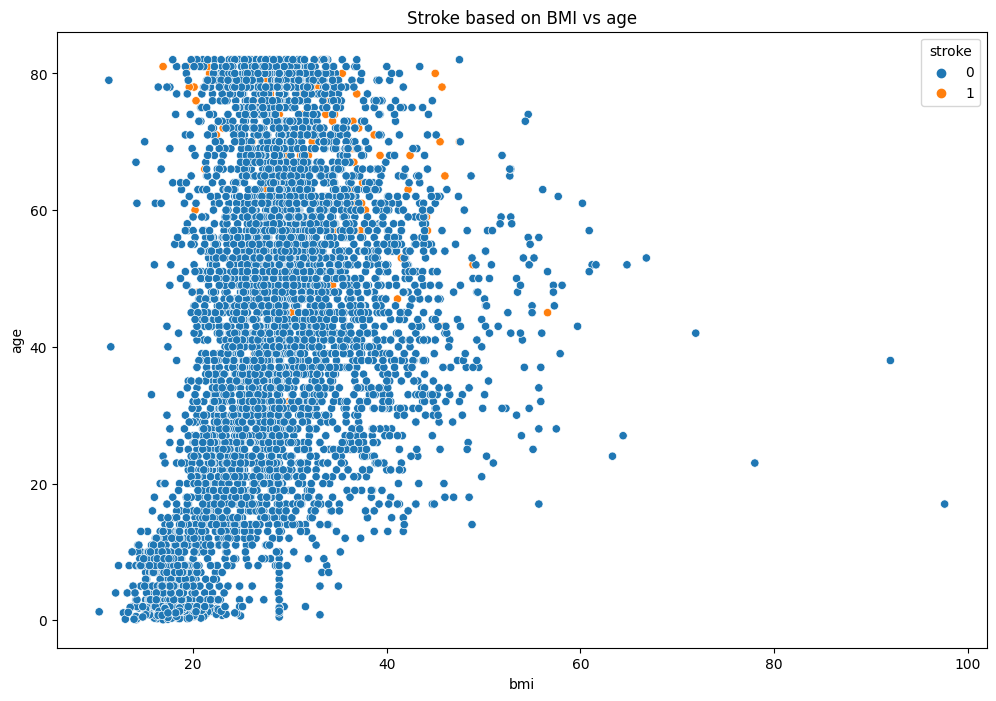

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='bmi',y='age' , hue='stroke')
plt.title('Stroke based on BMI vs age')
plt.show()

**11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.**

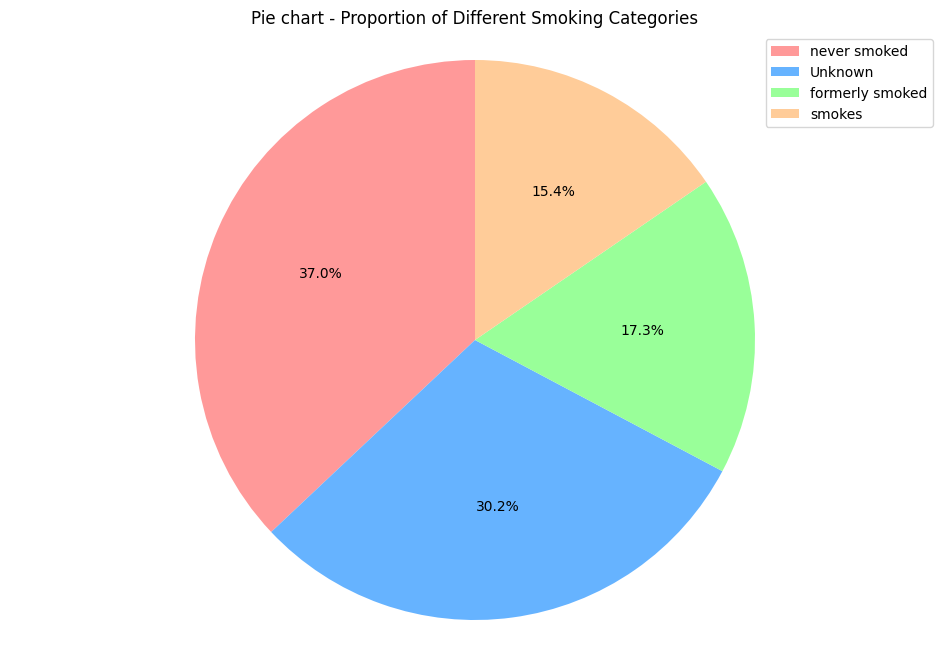

In [22]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(12, 8))
plt.pie(x=df.smoking_status.value_counts(), autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pie chart - Proportion of Different Smoking Categories')
plt.legend(df.smoking_status.value_counts().index, loc='best')
plt.axis('equal')
plt.show()

**12. Perform hypothesis testing to find the significant variables**

In [23]:
numerical_vars = ["age", "avg_glucose_level", "bmi"]
categorical_vars = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

In [24]:
# Hypothesis testing for numerical variables using t-test
for var in numerical_vars:
    stroke_yes = df[df["stroke"] == 1][var]
    stroke_no = df[df["stroke"] == 0][var]
    t_stat, p = ttest_ind(stroke_yes, stroke_no)
    print(f"T-test result for {var}: p-value = {p}")
    if p > 0.05:
        print(f"As the p-value is greater than alpha (0.05), {var} is less significant to stroke.\n")
    else:
        print(f"As the p-value is less than alpha (0.05), {var} is highly significant to stroke.\n")


T-test result for age: p-value = 7.0307775129939774e-71
As the p-value is less than alpha (0.05), age is highly significant to stroke.

T-test result for avg_glucose_level: p-value = 2.7678105194741054e-21
As the p-value is less than alpha (0.05), avg_glucose_level is highly significant to stroke.

T-test result for bmi: p-value = 0.005375631048606886
As the p-value is less than alpha (0.05), bmi is highly significant to stroke.



In [25]:
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["stroke"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {var}: p-value = {p}")
    if p > 0.05:
        print(f"As the p-value is greater than alpha (0.05), {var} is less significant to stroke.\n")
    else:
        print(f"As the p-value is less than alpha (0.05), {var} is highly significant to stroke.\n")

Chi-square test result for gender: p-value = 0.7895490538408245
As the p-value is greater than alpha (0.05), gender is less significant to stroke.

Chi-square test result for ever_married: p-value = 1.6389021142314745e-14
As the p-value is less than alpha (0.05), ever_married is highly significant to stroke.

Chi-square test result for work_type: p-value = 5.397707801896119e-10
As the p-value is less than alpha (0.05), work_type is highly significant to stroke.

Chi-square test result for Residence_type: p-value = 0.29833169286876987
As the p-value is greater than alpha (0.05), Residence_type is less significant to stroke.

Chi-square test result for smoking_status: p-value = 2.0853997025008455e-06
As the p-value is less than alpha (0.05), smoking_status is highly significant to stroke.



**13. Drop the unnecessary columns.**

In [26]:
df.drop(['id','gender','Residence_type'],axis=1,inplace=True)

- Dropped 'ID' as it does not contribute to stroke prediction. Also, dropped 'gender' and 'Residence_type' due to their lesser significance to stroke, as indicated by hypothesis testing.

In [27]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

**14. Write the code to replace following categories columns in integer format as follow**

        a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
        b) ever_married('Yes': 1, 'No': 0)
        c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [28]:
#a)
from sklearn.preprocessing import OrdinalEncoder

work_type_map = {'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}

# encoder=OrdinalEncoder(categories=[sorted(work_type_map.keys())])

# encoded_work_type= encoder.fit_transform(df[['work_type']])

df['work_type']= df['work_type'].map(work_type_map)

In [29]:
df.work_type.value_counts()

work_type
 0    2925
 1     819
-1     687
 2     657
-2      22
Name: count, dtype: int64

In [30]:
#b)
married_map = {'Yes':1 , 'No':0}

df.ever_married = df.ever_married.map(married_map)

In [31]:
df.ever_married.value_counts()

ever_married
1    3353
0    1757
Name: count, dtype: int64

In [32]:
#c)

smoke_map = {'never smoked': 0,'Unknown': 1,'formerly smoked':2,'smokes':-1}

# encoder=OrdinalEncoder(categories=[sorted(smoke_map.keys())])

# encoded_smoke= encoder.fit_transform(df[['smoking_status']])

df['smoking_status']= df['smoking_status'].map(smoke_map)


In [33]:
df.smoking_status.value_counts()

smoking_status
 0    1892
 1    1544
 2     885
-1     789
Name: count, dtype: int64

**15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.**


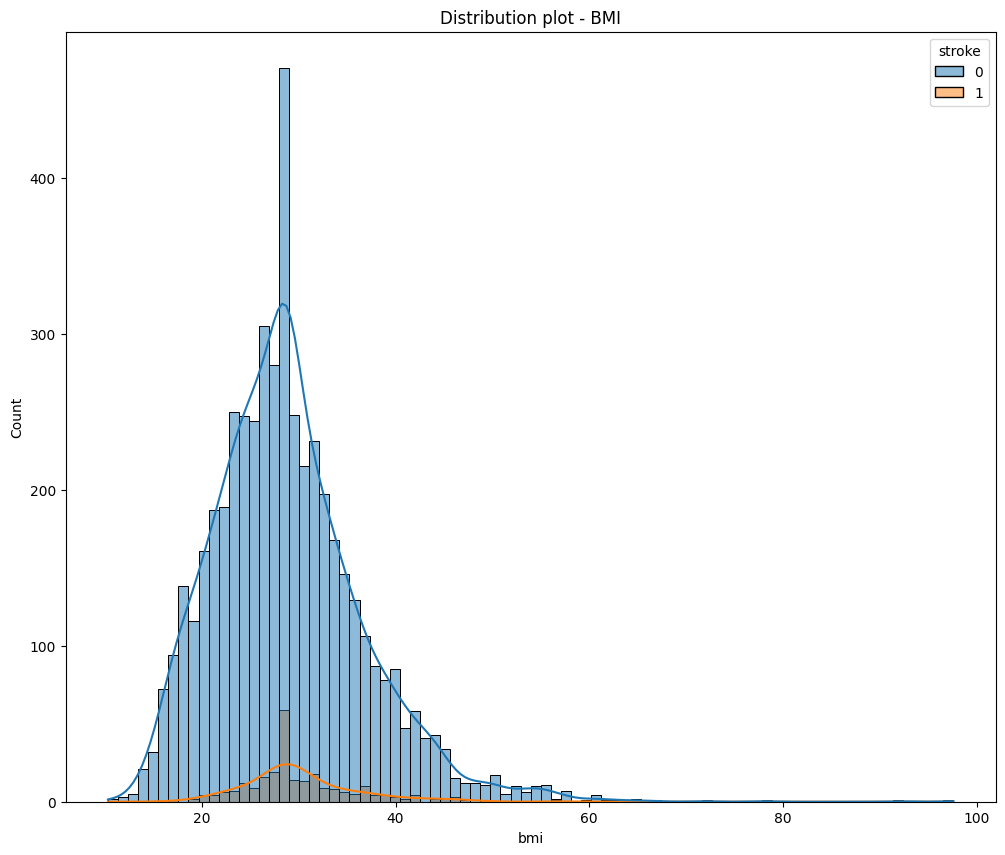

In [34]:
plt.figure(figsize=(12, 10))
sns.histplot(data=df,x='bmi', kde=True ,hue= 'stroke')
plt.title('Distribution plot - BMI')
plt.show()

<Figure size 500x500 with 0 Axes>

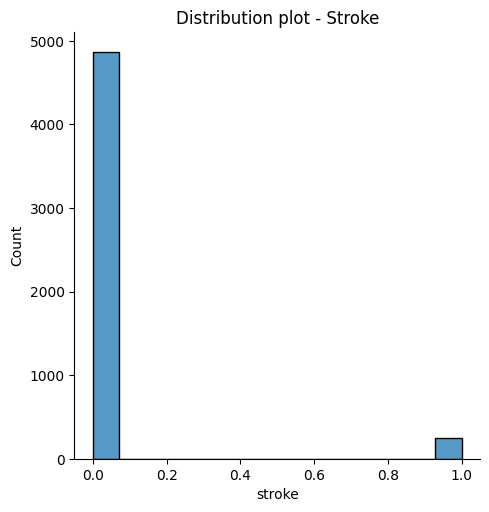

In [35]:
plt.figure(figsize=(5, 5))
sns.displot(data=df,x='stroke')
plt.title('Distribution plot - Stroke')
plt.show()

age Sknewness: -0.1370593225984694


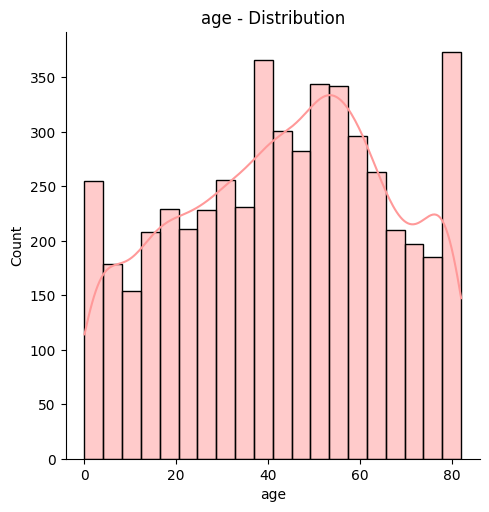

avg_glucose_level Sknewness: 1.5722838665030459


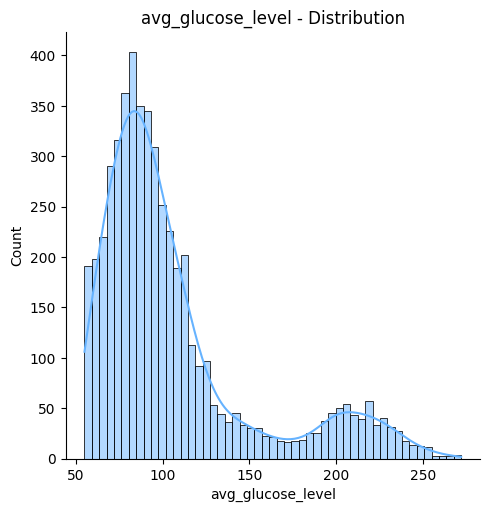

bmi Sknewness: 1.0767656990572412


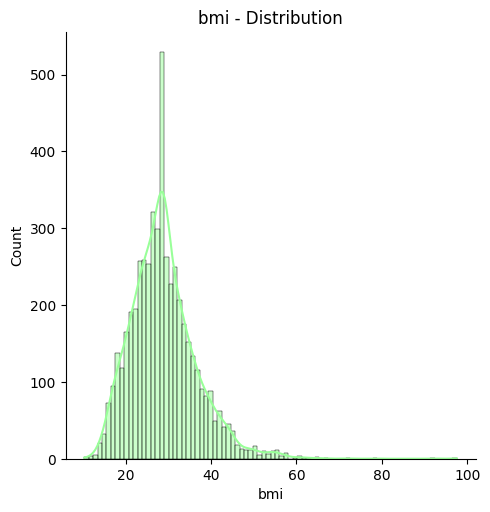

In [36]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
for i,col in enumerate(numerical_vars):
    print(f'{col} Sknewness:',df[col].skew())
    sns.displot(df[col],kde=True , color=colors[i])
    plt.title(f'{col} - Distribution')
    plt.show()

- All 3 numerical columns are highly sknewed

**17. List down the columns that are highly kurtosis**

In [37]:
for col in numerical_vars:
    kurtosis_value = df[col].kurt()
    print(f'{col} kurtosis:', kurtosis_value)
    
    if kurtosis_value > 0:
        print(f"{col} has positive kurtosis, indicating heavy tails.\n")
    elif kurtosis_value < 0:
        print(f"{col} has negative kurtosis, indicating light tails.\n")
    else:
        print(f"{col} has a kurtosis close to 0, indicating a normal distribution or mesokurtic distribution.\n")


age kurtosis: -0.9910102432016696
age has negative kurtosis, indicating light tails.

avg_glucose_level kurtosis: 1.6804785404038278
avg_glucose_level has positive kurtosis, indicating heavy tails.

bmi kurtosis: 3.623132529784526
bmi has positive kurtosis, indicating heavy tails.



**18. Find the distribution of all variables with respect to the outcome 'stroke' variable.**

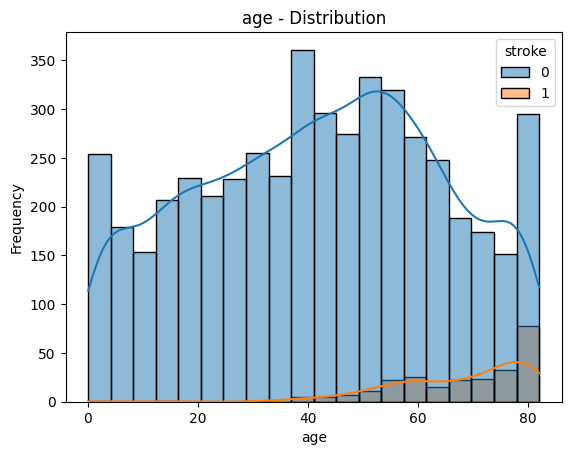

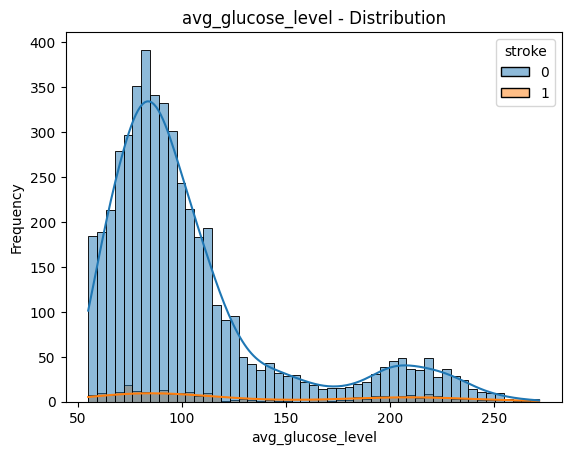

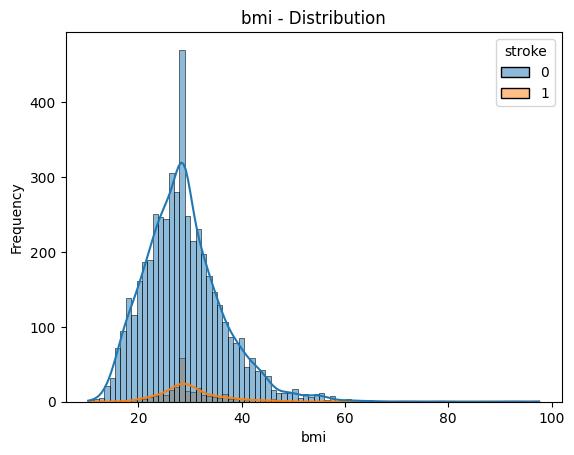

In [38]:
for col in numerical_vars:
    sns.histplot(data=df,x=col,kde=True , hue='stroke')
    plt.title(f'{col} - Distribution')
    plt.ylabel('Frequency')
    plt.show()

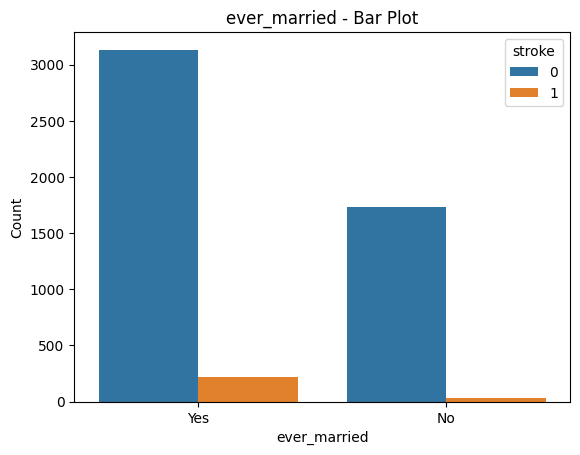

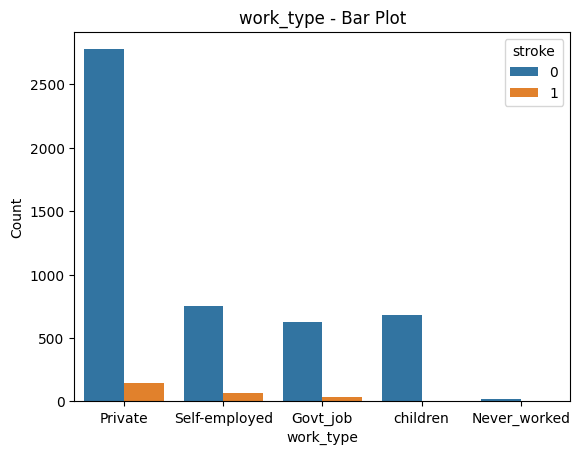

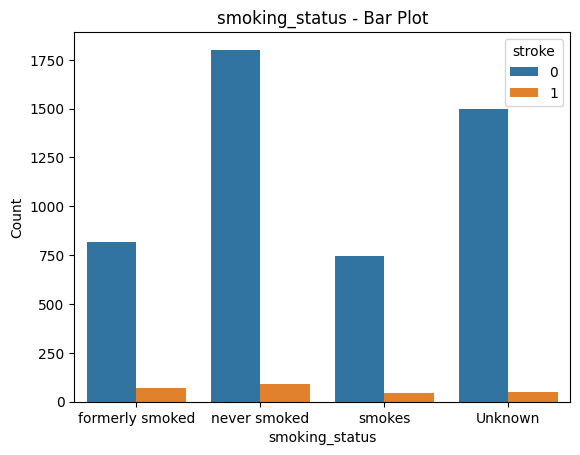

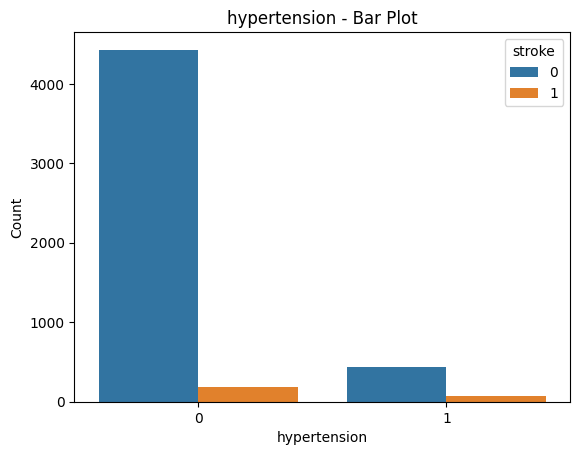

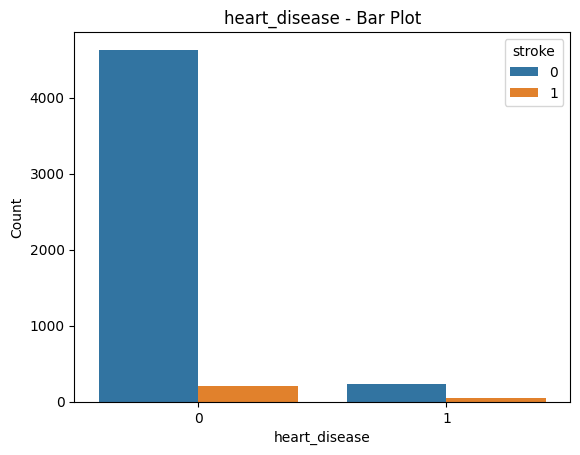

In [39]:
categorical_vars=['ever_married', 'work_type', 'smoking_status','hypertension','heart_disease']
df_original=pd.read_csv('healthcare-dataset-stroke-data.csv')
for col in categorical_vars:
    sns.countplot(data=df_original, x=col, hue='stroke')
    plt.title(f'{col} - Bar Plot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)**


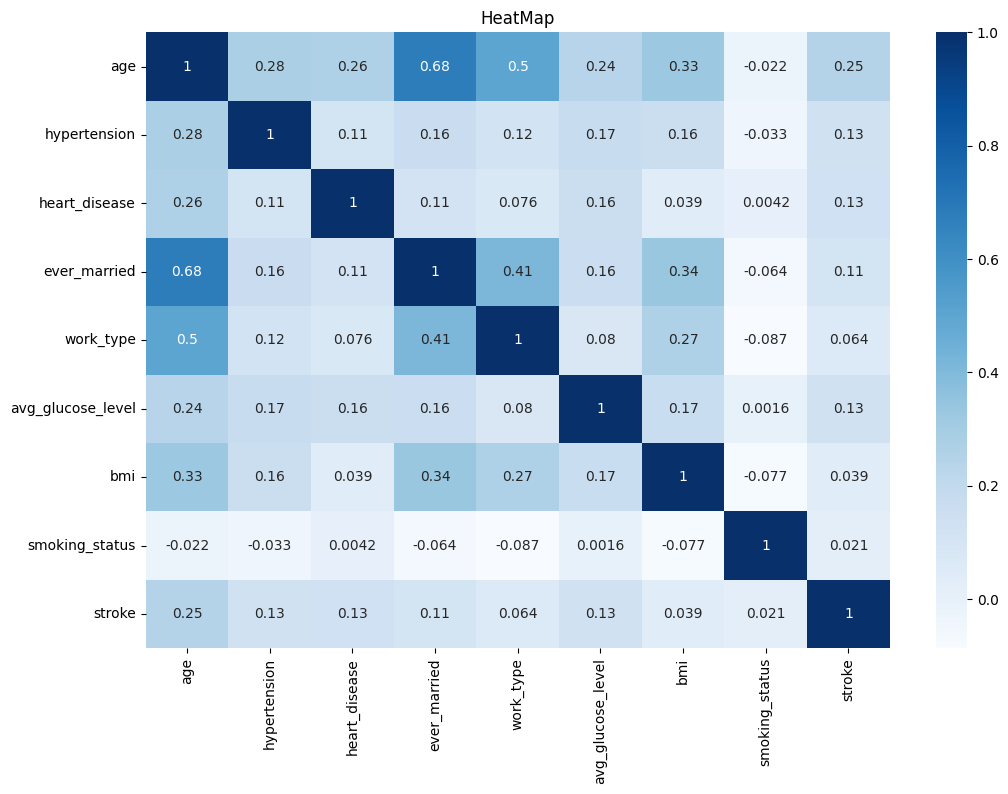

In [40]:
corr=df.corr()
plt.figure(figsize=(12,8))
plt.title('HeatMap')
sns.heatmap(corr , annot=True , cmap='Blues')
plt.show()

- we dont see any strong correlation b/w independent variables in the dataset.
- we see positive correlation b/w age and ever_married , which is expected as age increases people tend to marry.
- we see positive correlation b/w BMI and ever_married
- we see positive correlation b/w Age and BMI , which is expected as age increases BMI increases

**Outliers and treatment**

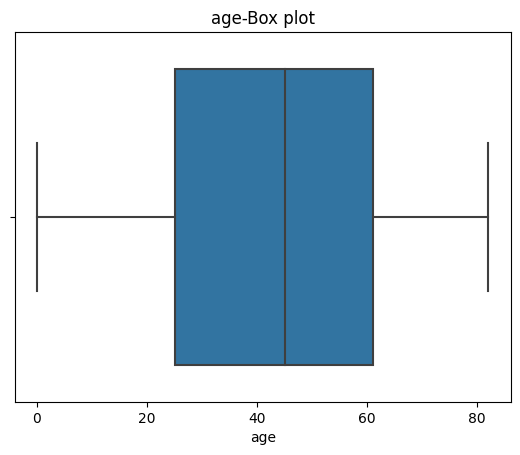

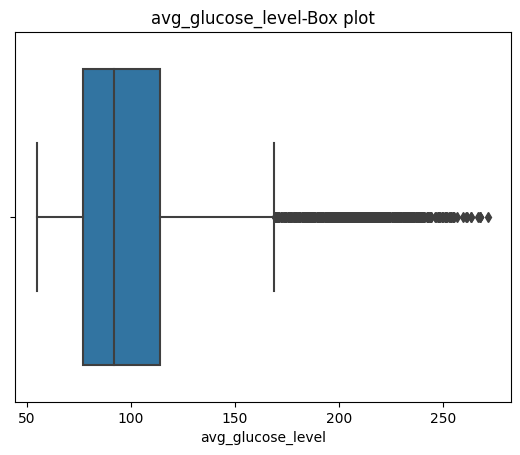

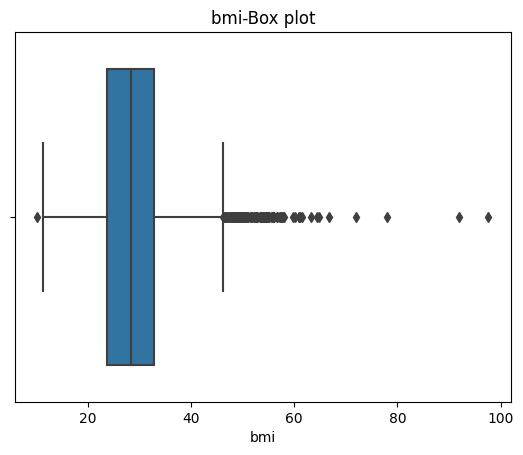

In [41]:
for col in numerical_vars:
    sns.boxplot(data=df,x=col,hue='stroke')
    plt.title(f'{col}-Box plot')
    plt.show()

In [42]:
df[(df.stroke == 1) & (df.age<=30)]['age'].value_counts()

age
1.32     1
14.00    1
Name: count, dtype: int64

In [43]:
df_original[(df_original.stroke == 1) & (df.work_type=='children')].shape[0]

0

In [44]:
drop_index=df[ (df.age<=30)].index
df.drop(index=drop_index , inplace=True)

In [45]:
df.shape

(3540, 9)

- Dropped members below the age of 30, as we observed only two reported stroke under 30 based on outlier analysis. We believe that if we train the machine learning algorithm with all the data, it will most likely treat members below the age of 30 as non-stroke class members.

**21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique**

In [46]:
df.stroke.value_counts()

stroke
0    3293
1     247
Name: count, dtype: int64

- we see members affected with stoke is under represented in the dataset ,ie) there an imbalanced data's in dataset

In [47]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('stroke', axis=1)
y = df['stroke']

rus = RandomUnderSampler(random_state=42)

X_resample, y_resample = rus.fit_resample(X, y)


X_resampled_df = pd.DataFrame(X_resample, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resample, columns=['stroke'])

undersampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
undersampled_df.stroke.value_counts()

stroke
0    247
1    247
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X=df.drop('stroke', axis=1)
y=df['stroke']

smote=SMOTE(random_state=42)

X_resample , y_resample = smote.fit_resample(X,y)

- Used SMOTE technique to resample the stroke (1) class

In [50]:
X_resampled_df = pd.DataFrame(X_resample, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resample, columns=['stroke'])
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
resampled_df.stroke.value_counts()

stroke
1    3293
0    3293
Name: count, dtype: int64

- Balanced data

# **Model Training**

**20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=df.drop('stroke', axis=1)
y=df['stroke']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30 ,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2478, 8), (1062, 8), (2478,), (1062,))

**22. Model Selection/hyperparameter tuning**
       
 - Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
 - Model Evaluation : Evaluate the models using appropriate evaluation metrics.

**1.Logistic regression**

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [54]:
log_model=LogisticRegression()

In [55]:
log_model.fit(X_train,y_train)

LogisticRegression()

**Using original data**

In [56]:
y_pred=log_model.predict(X_test)

In [57]:
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)

In [58]:
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)


accuracy_score: 0.9303201506591338
recall_score: 0.0
precision_score: 0.0


- accuracy is high (94%) but both precision and recall are 0, it indicates that the model might be high biased towards predicting the majority class(No-stroke)
- Going forward we use resampled df for model building

**Standard Scaling**

In [59]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
X=resampled_df.drop('stroke', axis=1)
y=resampled_df['stroke']
# X_scale = scale.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30 ,random_state=1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4610, 8), (1976, 8), (4610,), (1976,))

In [60]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.7474696356275303
recall_score: 0.7444444444444445
precision_score: 0.7497456765005086
f1_score: 0.7470856563608718


In [61]:
result = pd.DataFrame(data=[['Logistic regression',acc, recall, prec, f1]],
                      columns=['Model','Accuracy', 'Recall', 'Precision', 'F1_score'])

**Hyperparameter tunning**

In [62]:
params={
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 200, 300, 400, 500]
}

In [63]:
tunned_log_model=GridSearchCV(log_model,param_grid=params,scoring='accuracy',cv=5)

In [64]:
tunned_log_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [65]:
print(tunned_log_model.best_params_)
print(tunned_log_model.best_estimator_)
tunned_log_model.best_score_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, solver='liblinear')


0.7425162689804772

In [66]:
y_pred=tunned_log_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.7469635627530364
recall_score: 0.7434343434343434
precision_score: 0.7494908350305499
f1_score: 0.7464503042596349


In [67]:
new_row = pd.DataFrame(data=[['Tuned logistic  model', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**2.Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model_decision_tree=DecisionTreeClassifier()

In [70]:
model_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=model_decision_tree.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.8410931174089069
recall_score: 0.8575757575757575
precision_score: 0.8307240704500979
f1_score: 0.8439363817097415


In [72]:
new_row = pd.DataFrame(data=[['Decision tree', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [73]:
params = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],     # Strategy to choose the split
    'max_depth': [None, 5,6,7,8,9,10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'random_state': [42]  # Random state for reproducibility
}
tunned_decision_tree_model=GridSearchCV(model_decision_tree,param_grid=params,scoring='accuracy',cv=5)

In [74]:
tunned_decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [42],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
print(tunned_decision_tree_model.best_params_)
print(tunned_decision_tree_model.best_estimator_)
tunned_decision_tree_model.best_score_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
DecisionTreeClassifier(max_features='log2', random_state=42)


0.8501084598698482

In [76]:
y_pred=tunned_decision_tree_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.8517206477732794
recall_score: 0.8646464646464647
precision_score: 0.8433497536945813
f1_score: 0.8538653366583541


In [77]:
new_row = pd.DataFrame(data=[['Tunned Decision tree', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**3.KNN**

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
KNN_model=KNeighborsClassifier()

In [80]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred=KNN_model.predict(X_test)

In [82]:
y_pred=KNN_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.84665991902834
recall_score: 0.9595959595959596
precision_score: 0.7831821929101401
f1_score: 0.8624602814344077


In [83]:
new_row = pd.DataFrame(data=[['KNN', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [84]:
params = {
    'n_neighbors': range(0, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [85]:
knn_tuned=GridSearchCV(KNN_model,param_grid=params, scoring='accuracy',cv=5)

In [86]:
knn_tuned.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(0, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [87]:
print(knn_tuned.best_estimator_)
print(knn_tuned.best_params_)
knn_tuned.best_score_

KNeighborsClassifier(n_neighbors=1, p=1)
{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


0.8748373101952278

In [88]:
y_pred=knn_tuned.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.8825910931174089
recall_score: 0.9595959595959596
precision_score: 0.8318739054290718
f1_score: 0.8911819887429644


In [89]:
new_row = pd.DataFrame(data=[['Tunned KNN', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**4.NAIVE BAYES**

In [90]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB

In [91]:
GNB_model=GaussianNB() 
BNB_model=BernoulliNB()

In [92]:
GNB_model.fit(X_train,y_train)

GaussianNB()

In [93]:
y_pred=GNB_model.predict(X_test)

In [94]:
y_pred=GNB_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.7560728744939271
recall_score: 0.7686868686868686
precision_score: 0.7504930966469427
f1_score: 0.7594810379241517


In [95]:
new_row = pd.DataFrame(data=[['GaussianNB', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [96]:
BNB_model.fit(X_train,y_train)

BernoulliNB()

In [97]:
y_pred=BNB_model.predict(X_test)

In [98]:
y_pred=BNB_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.5804655870445344
recall_score: 0.7232323232323232
precision_score: 0.5633359559402046
f1_score: 0.6333480760725343


In [99]:
new_row = pd.DataFrame(data=[['BernoulliNB', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [100]:
params= {
    'alpha': [1e-6,1e-7 ,1e-5,1e-4,0.001, 0.01, 0.1, 1.0, 10.0]
}

BNB_tuned = GridSearchCV(BNB_model, params, cv=5, scoring='accuracy')
BNB_tuned.fit(X_train,y_train)

print(BNB_tuned.best_params_)
BNB_tuned.best_score_

{'alpha': 1e-06}


0.5652928416485901

In [101]:
y_pred=BNB_tuned.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.5804655870445344
recall_score: 0.7232323232323232
precision_score: 0.5633359559402046
f1_score: 0.6333480760725343


**Ensemble Techniques**

**5.Random forest**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc_model=RandomForestClassifier(random_state=24)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(random_state=24)

In [104]:
y_pred=rfc_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.90334008097166
recall_score: 0.9262626262626262
precision_score: 0.8859903381642512
f1_score: 0.905679012345679


In [105]:
new_row = pd.DataFrame(data=[['Random Forest', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [106]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [107]:
rfc_tuned=GridSearchCV(rfc_model,param_grid=params,cv=10,scoring='accuracy',n_jobs=-1)
# rfc_tuned.fit(X_train,y_train)

In [108]:
rfc_tuned_model=RandomForestClassifier(bootstrap= False,max_depth= None,min_samples_leaf= 1,min_samples_split= 2,
                                        n_estimators= 100)
rfc_tuned_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False)

In [109]:
y_pred=rfc_tuned_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.9018218623481782
recall_score: 0.9121212121212121
precision_score: 0.8940594059405941
f1_score: 0.903


In [110]:
new_row = pd.DataFrame(data=[['Tunned Random Forest', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**6.Bagging and Boosting**

In [111]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

In [112]:
bag_model=BaggingClassifier(estimator=rfc_tuned_model).fit(X_train,y_train)
y_pred=bag_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.8937246963562753
recall_score: 0.9141414141414141
precision_score: 0.8786407766990292
f1_score: 0.8960396039603961


In [113]:
new_row = pd.DataFrame(data=[['Bagging Random Forest', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**7.Adaboosting**

In [114]:
ada_model=AdaBoostClassifier(estimator=rfc_tuned_model,learning_rate=0.5).fit(X_train,y_train)
y_pred=ada_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.9038461538461539
recall_score: 0.9191919191919192
precision_score: 0.8921568627450981
f1_score: 0.9054726368159204


In [115]:
new_row = pd.DataFrame(data=[['Adaboost', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**8.XG-Boost**

In [116]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier(learning_rate=0.1).fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.8765182186234818
recall_score: 0.9030303030303031
precision_score: 0.8579654510556622
f1_score: 0.8799212598425197


In [117]:
new_row = pd.DataFrame(data=[['XGB Classifier', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

**9.SVM**

In [118]:
from sklearn.svm import SVC
svm_model=SVC().fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy_score:',acc)
print('recall_score:',recall)
print('precision_score:',prec)
print('f1_score:',f1)

accuracy_score: 0.7196356275303644
recall_score: 0.7666666666666667
precision_score: 0.7014787430683919
f1_score: 0.7326254826254827


In [119]:
new_row = pd.DataFrame(data=[['SVM Classifier', acc, recall, prec, f1]],
                       columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1_score'])

result = pd.concat([result, new_row], ignore_index=True)

In [120]:
result=result.sort_values(by=['Recall','Accuracy'],ascending=False)
result

,Model,Accuracy,Recall,Precision,F1_score
5,Tunned KNN,0.882591,0.959596,0.831874,0.891182
4,KNN,0.846660,0.959596,0.783182,0.862460
8,Random Forest,0.903340,0.926263,0.885990,0.905679
11,Adaboost,0.903846,0.919192,0.892157,0.905473
10,Bagging Random Forest,0.893725,0.914141,0.878641,0.896040
9,Tunned Random Forest,0.901822,0.912121,0.894059,0.903000
12,XGB Classifier,0.876518,0.903030,0.857965,0.879921
3,Tunned Decision tree,0.851721,0.864646,0.843350,0.853865
2,Decision tree,0.841093,0.857576,0.830724,0.843936
6,GaussianNB,0.756073,0.768687,0.750493,0.759481


**Plotting the performance score on recall**

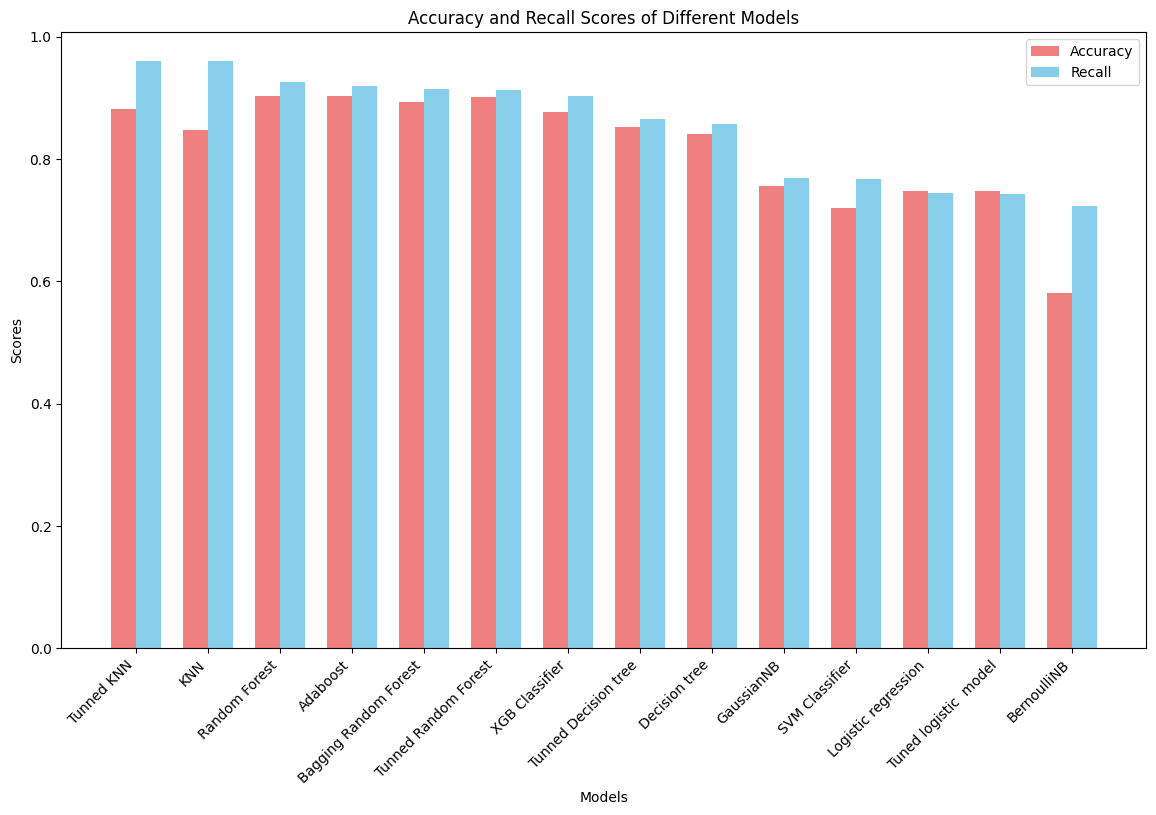

In [121]:
fig, ax = plt.subplots(figsize=(14, 8))

index = np.arange(len(result))
bar_width = 0.35

rects1 = ax.bar(index, result['Accuracy'], bar_width, color='lightcoral', label='Accuracy')
rects2 = ax.bar(index + bar_width, result['Recall'], bar_width, color='skyblue', label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall Scores of Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result['Model'], rotation=45, ha='right')
ax.legend()

plt.show()


# **Clustering**

In [122]:
from sklearn.cluster import KMeans,DBSCAN

**kmeans cluster**

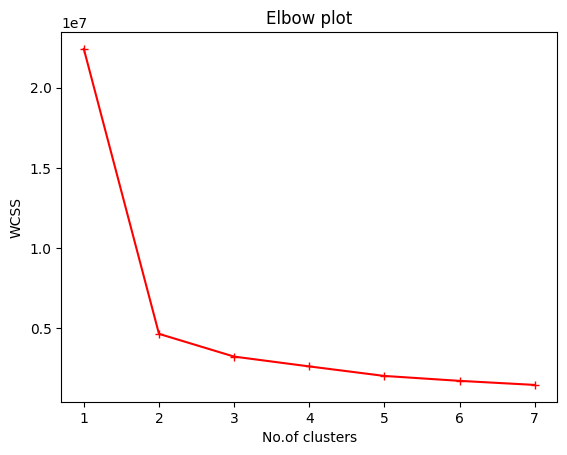

In [123]:
r=range(1,8)
wcss=[]
for k in r:
    kmeans=KMeans(k).fit(resampled_df)
    wcss.append(kmeans.inertia_)

plt.plot(r,wcss,'r-+')
plt.title('Elbow plot')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [124]:
cluster_df=df
kmeans = KMeans(n_clusters=2).fit(df)
# kmean_df['kMean_cluster']=kmeans.labels_

In [125]:
# cluster_df[kmean_df.kMean_cluster==0]['stroke'].value_counts()

In [126]:
# cluster_df[kmean_df.kMean_cluster==1]['stroke'].value_counts()

**DBSCAN cluster**

In [127]:
DBS=DBSCAN(eps=0.001,min_samples=5).fit(resampled_df)

In [128]:
resampled_df['DB_cluster']=DBS.labels_

In [129]:
resampled_df.DB_cluster.value_counts()

DB_cluster
-1    6586
Name: count, dtype: int64

# Finalizing model

In [130]:
final_model=KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',p=1)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
recall

0.9595959595959596

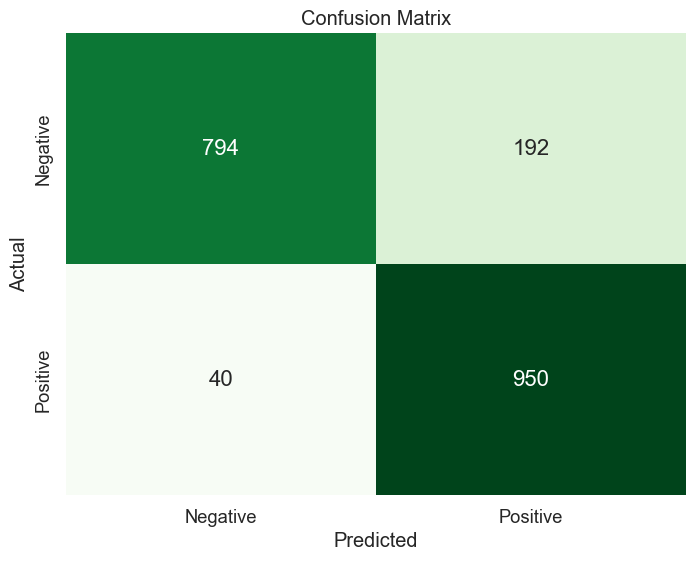

In [131]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 16}, cbar=False,cmap='Greens')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])

plt.show()

In [132]:
# final_model.predict([[65, 1, 1, 0, 1, 200, 30, -1]])

# Saving Model

In [133]:
import pickle

In [134]:
pickle.dump(final_model,open('model.pkl','wb'))

In [136]:
resampled_df[resampled_df.stroke == 1].describe()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,DB_cluster
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.0,3293.0
mean,68.800003,0.085940,0.058002,0.799879,0.296690,132.070257,29.971460,0.438506,1.0,-1.0
std,11.027645,0.280318,0.233782,0.400152,0.503069,60.485036,4.980096,0.725092,0.0,0.0
min,32.000000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,-1.000000,1.0,-1.0
25%,59.997142,0.000000,0.000000,1.000000,0.000000,80.250233,27.179675,0.000000,1.0,-1.0
50%,72.128477,0.000000,0.000000,1.000000,0.000000,106.290604,28.892320,0.000000,1.0,-1.0
75%,78.203032,0.000000,0.000000,1.000000,1.000000,195.693229,32.081292,1.000000,1.0,-1.0
max,82.000000,1.000000,1.000000,1.000000,2.000000,271.740000,56.600000,2.000000,1.0,-1.0


In [143]:
resampled_df[resampled_df.stroke == 0].describe()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,DB_cluster
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.0,3293.0
mean,54.530519,0.127847,0.068934,0.889159,0.552080,109.794425,30.885217,0.448527,0.0,-1.0
std,14.345229,0.333970,0.253381,0.313983,0.764555,48.950508,7.037914,1.023498,0.0,0.0
min,31.000000,0.000000,0.000000,0.000000,0.000000,55.220000,11.300000,-1.000000,0.0,-1.0
25%,43.000000,0.000000,0.000000,1.000000,0.000000,77.910000,26.300000,0.000000,0.0,-1.0
50%,54.000000,0.000000,0.000000,1.000000,0.000000,92.810000,29.500000,0.000000,0.0,-1.0
75%,65.000000,0.000000,0.000000,1.000000,1.000000,117.450000,34.300000,1.000000,0.0,-1.0
max,82.000000,1.000000,1.000000,1.000000,2.000000,267.760000,92.000000,2.000000,0.0,-1.0


In [138]:
resampled_df[resampled_df.stroke == 1]['hypertension'].value_counts()

hypertension
0    3010
1     283
Name: count, dtype: int64

In [139]:
resampled_df[resampled_df.stroke == 1]['heart_disease'].value_counts()

heart_disease
0    3102
1     191
Name: count, dtype: int64

In [140]:
resampled_df[resampled_df.stroke == 1]['ever_married'].value_counts()

ever_married
1    2634
0     659
Name: count, dtype: int64

In [141]:
resampled_df[resampled_df.stroke == 1]['work_type'].value_counts()

work_type
0    2389
1     831
2      73
Name: count, dtype: int64

In [142]:
resampled_df[resampled_df.stroke == 1]['smoking_status'].value_counts()

smoking_status
 0    1874
 1     959
 2     315
-1     145
Name: count, dtype: int64